In [1]:
from joblib import dump, load
import pandas as pd
from sklearn.feature_extraction import FeatureHasher
import numpy as np
from sklearn.metrics import log_loss
from sklearn import decomposition
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [2]:
column_names = ['label','interger1','interger2','interger3','interger4','interger5','interger6',
                'interger7','interger8','interger9','interger10','interger11','interger12','interger13',
                'categorical1','categorical2','categorical3','categorical4','categorical5','categorical6',
                'categorical7','categorical8','categorical9','categorical10','categorical11','categorical12',
                'categorical13','categorical14','categorical15','categorical16','categorical17','categorical18',
                'categorical19','categorical20','categorical21','categorical22','categorical23','categorical24',
                'categorical25','categorical26']

In [3]:
df = pd.read_csv('/home/bahbbc/workspace/display-ads-challenge/dac/train.txt', sep='\t',
            names=column_names, chunksize=327433, engine='python')

In [31]:
chunk = df.get_chunk(327433)

In [5]:
chunk.head()

,label,interger1,interger2,interger3,interger4,interger5,interger6,interger7,interger8,interger9,...,categorical17,categorical18,categorical19,categorical20,categorical21,categorical22,categorical23,categorical24,categorical25,categorical26
0,0,1.0,1,5.0,0.0,1382.0,4.0,15.0,2.0,181.0,...,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,NaN,3a171ecb,c5c50484,e8b83407,9727dd16
1,0,2.0,0,44.0,1.0,102.0,8.0,2.0,2.0,4.0,...,07c540c4,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,3a171ecb,43f13e8b,e8b83407,731c3655
2,0,2.0,0,1.0,14.0,767.0,89.0,4.0,2.0,245.0,...,8efede7f,3412118d,NaN,NaN,e587c466,ad3062eb,3a171ecb,3b183c5c,NaN,NaN
3,0,NaN,893,NaN,NaN,4392.0,NaN,0.0,0.0,0.0,...,1e88c74f,74ef3502,NaN,NaN,6b3a5ca6,NaN,3a171ecb,9117a34a,NaN,NaN
4,0,3.0,-1,NaN,0.0,2.0,0.0,3.0,0.0,0.0,...,1e88c74f,26b3c7a7,NaN,NaN,21c9516a,NaN,32c7478e,b34f3128,NaN,NaN


In [6]:
chunk.label.value_counts()

0    244981
1     82452
Name: label, dtype: int64

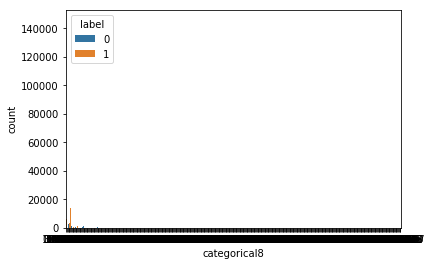

In [7]:
sns.countplot(x="categorical8", hue="label", data=chunk);

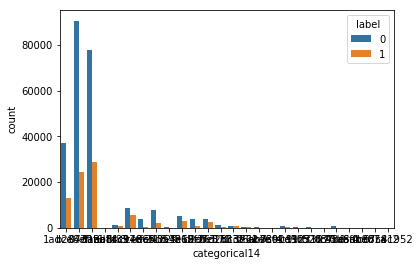

In [8]:
sns.countplot(x="categorical14", hue="label", data=chunk);

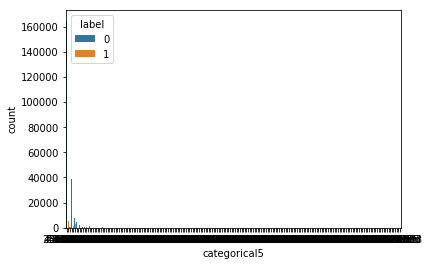

In [9]:
sns.countplot(x="categorical5", hue="label", data=chunk);

In [10]:
#sns.countplot(x="categorical12", hue="label", data=chunk);

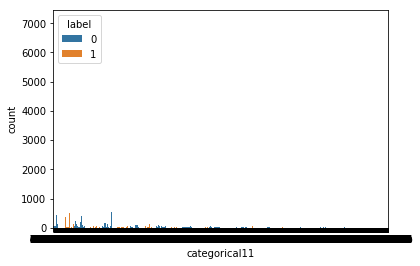

In [11]:
sns.countplot(x="categorical11", hue="label", data=chunk);

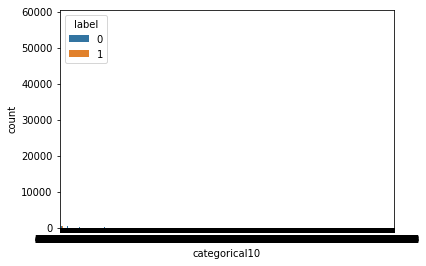

In [12]:
sns.countplot(x="categorical10", hue="label", data=chunk);

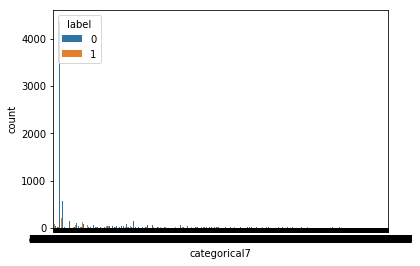

In [13]:
sns.countplot(x="categorical7", hue="label", data=chunk);

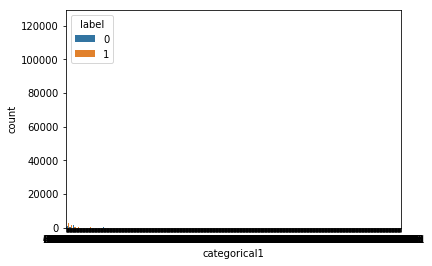

In [14]:
sns.countplot(x="categorical1", hue="label", data=chunk);

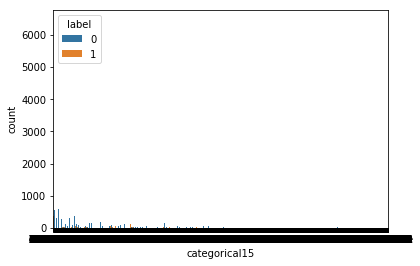

In [15]:
sns.countplot(x="categorical15", hue="label", data=chunk);

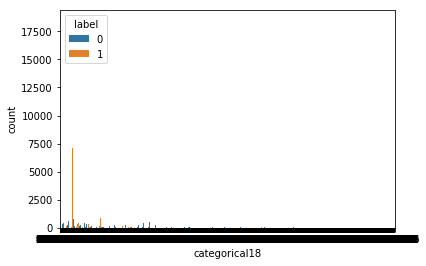

In [16]:
sns.countplot(x="categorical18", hue="label", data=chunk);

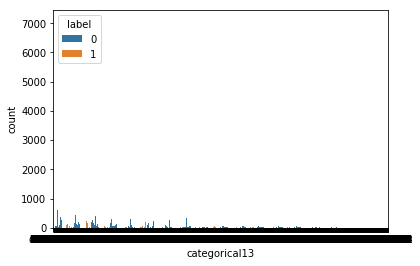

In [17]:
sns.countplot(x="categorical13", hue="label", data=chunk);

In [18]:
#sns.countplot(x="categorical16", hue="label", data=chunk);

## Integer vars

In [32]:
integer_cols = ['interger2', 'interger8', 'interger5','interger11', 'interger9', 'interger7']
chunk.update(chunk[integer_cols].fillna(-1))

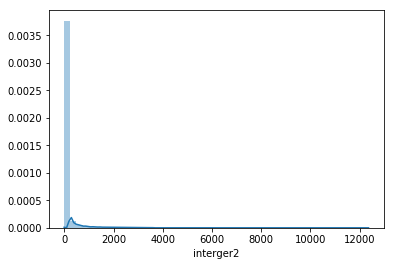

In [33]:
sns.distplot(chunk['interger2']);

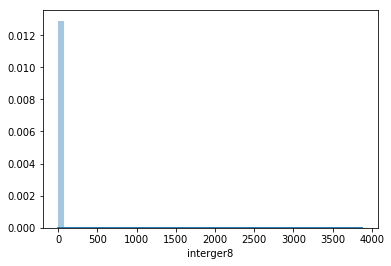

In [34]:
sns.distplot(chunk['interger8']);

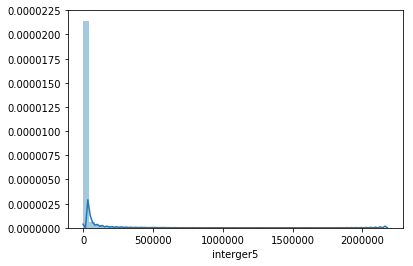

In [35]:
sns.distplot(chunk['interger5']);

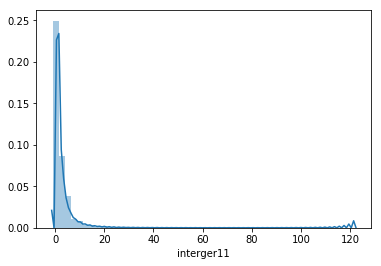

In [36]:
sns.distplot(chunk['interger11']);

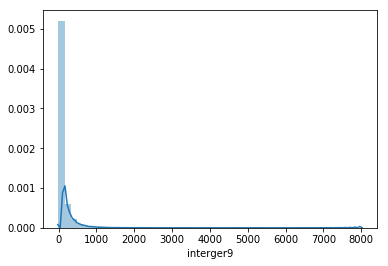

In [37]:
sns.distplot(chunk['interger9']);

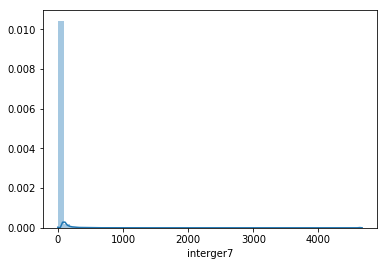

In [38]:
sns.distplot(chunk['interger7']);

## Verify categorical data with Feature Hasher

In [42]:
cat_vars = ['categorical8', 'categorical14', 'categorical5', 'categorical12', 'categorical11', 'categorical10', 'categorical7', 'categorical1', 'categorical15', 'categorical18', 'categorical13', 'categorical16']

In [43]:
feature_hasher = FeatureHasher(n_features=100)

In [45]:
X_cat = feature_hasher.transform(chunk[cat_vars].to_dict('records')).toarray()

In [48]:
X_cat[1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1.])